In [17]:
''' Unlike linear regresion, SVR has an ε Insensitive Tube, in which all
variables are not considered as errors. This allows a little bit of buffer to
the model. The points outside the ε Insensitive Tube are considered error. The
Tube for which the distance between the outer tube and the outlier points are
least is the selected model. '''

' Unlike linear regresion, SVR has an ε Insensitive Tube, in which all\nvariables are not considered as errors. This allows a little bit of buffer to\nthe model. The points outside the ε Insensitive Tube are considered error. The\nTube for which the distance between the outer tube and the outlier points are\nleast is the selected model. '

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
''' Feature Scaling is used since there is no explicity equation
of dependant variable to features. Coefficients in SLR, MLR and PLR
often get low values to compensate the high values of x. This balances
out all values and keep them near each other in the dataset. '''

' Feature Scaling is used since there is no explicity equation\nof dependant variable to features. Coefficients in SLR, MLR and PLR\noften get low values to compensate the high values of x. This balances\nout all values and keep them near each other in the dataset. '

In [20]:
 df = pd.read_csv('Position_Salaries.csv')

In [21]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [22]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [23]:
''' Implementing Feature Scaling
# Since the daset is not being split into training and test set,
feature scaling will be applied to all entire dataset.
Feature scaling is applied to get all variables of columns into same
range(e.g. 0-1) so that model can make more accurate predictions.
If one column has values 1-10 and a second column has values from
10,000 to ,1000,000. So values of the 2 features(columns) need to
be brought closeby'''

' Implementing Feature Scaling\n# Since the daset is not being split into training and test set,\nfeature scaling will be applied to all entire dataset.\nFeature scaling is applied to get all variables of columns into same\nrange(e.g. 0-1) so that model can make more accurate predictions.\nIf one column has values 1-10 and a second column has values from\n10,000 to ,1000,000. So values of the 2 features(columns) need to\nbe brought closeby'

In [24]:
''' Standard Scaler class expects 2D input, so y needs to be modified '''

' Standard Scaler class expects 2D input, so y needs to be modified '

In [25]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [26]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
''' X will be taken as whole since dataset isn't being split due to small size '''
X = sc_X.fit_transform(X)
''' sc has to be taken 2 times since the columns have largely different
means and sd which is used to Feature Scale. So if we use a single
sc variable we will get inaccurate scaling for one of the 2 columns.
So sc has to be initialised seperately. '''
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [28]:
''' Transformed X and y '''
print("X values")
print(X)
print("y values")
print(y)

X values
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
y values
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [29]:
''' Now making the SVR model '''
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
''' RBF is radial basis Kernel. SVM expects a Kernel selection
for it's models. RBF recommened in course. Selection
of Kernel depends on data type. Major kernels
in SVR include:
1. Linear
2. Polynomial
3. Radial Basis Function (RBF)
4. Gaussian
5. Sigmoid '''

" RBF is radial basis Kernel. SVM expects a Kernel selection\nfor it's models. RBF recommened in course. Selection\nof Kernel depends on data type. Major kernels\nin SVR include:\n1. Linear\n2. Polynomial\n3. Radial Basis Function (RBF)\n4. Gaussian\n5. Sigmoid "

In [30]:
regressor.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [37]:
''' Predicting the values '''
print(regressor.predict(X))
''' If we directly predict then the values will come in
Feature Scaled format, so we need to call the
predict function on the reverse(inverse)-scale the data '''

[-0.6197853  -0.62924694 -0.56788994 -0.49732233 -0.44690338 -0.36617206
 -0.14115569  0.28557658  0.78226531  1.08559794]


' If we directly predict then the values will come in \nFeature Scaled format, so we need to call the\npredict function on the reverse(inverse)-scale the data '

In [38]:
regressor.predict(sc_X.transform([[6.5]]))
''' prediction of specific value without
inverse transforming '''

' prediction of specific value without \ninverse transforming '

In [40]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

In [41]:
''' Reshape is used to avoid a format error, used only in SVR '''

' Reshape is used to avoid a format error, used only in SVR '

[]

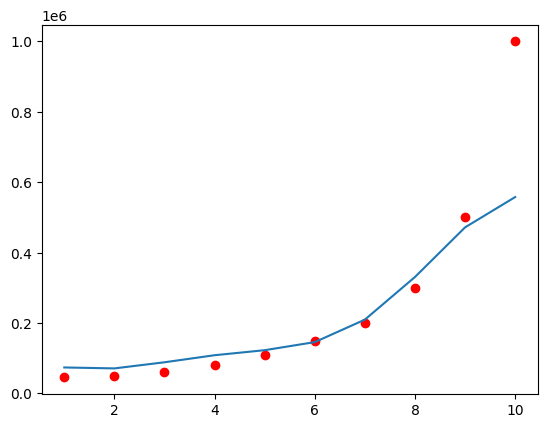

In [48]:
''' Now plotting the data to compare results. '''
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
''' Inverse transform is done so that the values come in original scale '''
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)))
''' Inverse transformed X is used to get X values on X axis.
The predict(X) is done to use X to get predicted y values. Graph line
is actual X data given as training plotted against predicted salary
on the y axis '''
plt.plot()